## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [0]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [25]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer))
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x))
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

SyntaxError: ignored

In [0]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZES = [32,128,256]
MOMENTUM = 0.95

In [23]:
results = {}
for BATCH_SIZE in BATCH_SIZES:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"BATCH SIZE: {BATCH_SIZE}")
    model = build_mlp(input_shape=x_train.shape[1:])
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
                epochs=EPOCHS, 
                batch_size=BATCH_SIZE, 
                validation_data=(x_test, y_test))

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    BATCH_SIZE_NAME = f"batch size : {BATCH_SIZE}"
    results[BATCH_SIZE_NAME] = {'train-loss': train_loss,
                                'valid-loss': valid_loss,
                                'train-acc': train_acc,
                                'valid-acc': valid_acc}

BATCH SIZE: 32
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 14s 277us/step - loss: 1.7468 - acc: 0.3785 - val_loss: 1.7620 - val_acc: 0.3733
Epoch 2/30
50000/50000 [==============================] - 13s 264us/step - loss: 1.5783 - acc: 0.4369 - val_loss: 1.6477 - val_acc: 0.4228
Epoch 3/30
50000/50000 [==============================] - 13s 265us/step - loss: 1.5017 - acc: 0.4654 - val_loss: 1.6948 - val_acc: 0.4022
Epoch 4/30
50000/50000 [==============================] - 13s 259us/step - loss: 1.4406 - acc: 0.4902 - val_loss: 1.5235 - val_acc: 0.4579
Epoch 5/30
50000/50000 [==============================] - 13s 264us/step - loss: 1.3876 - acc: 0.5068 - val_loss: 1.4566 - val_acc: 0.4815
Epoch 6/30
50000/50000 [==============================] - 13s 262us/step - loss: 1.3600 - acc: 0.5143 - val_loss: 1.4544 - val_acc: 0.4759
Epoch 7/30
50000/50000 [==============================] - 13s 264us/step - loss: 1.3272 - acc: 0.5298

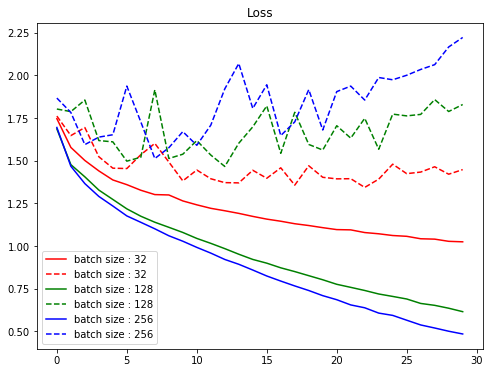

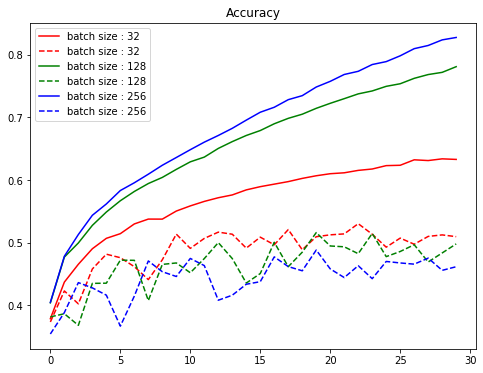

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [26]:
results = {}
for BATCH_SIZE in BATCH_SIZES:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"BATCH SIZE: {BATCH_SIZE}")
    model = build_mlp(input_shape=x_train.shape[1:])
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
                epochs=EPOCHS, 
                batch_size=BATCH_SIZE, 
                validation_data=(x_test, y_test))

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    BATCH_SIZE_NAME = f"batch size before activate: {BATCH_SIZE}"
    results[BATCH_SIZE_NAME] = {'train-loss': train_loss,
                                'valid-loss': valid_loss,
                                'train-acc': train_acc,
                                'valid-acc': valid_acc}

BATCH SIZE: 32
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 14s 279us/step - loss: 1.7499 - acc: 0.3793 - val_loss: 1.8271 - val_acc: 0.3504
Epoch 2/30
50000/50000 [==============================] - 13s 260us/step - loss: 1.5729 - acc: 0.4406 - val_loss: 1.7854 - val_acc: 0.3690
Epoch 3/30
50000/50000 [==============================] - 13s 262us/step - loss: 1.5007 - acc: 0.4637 - val_loss: 1.5103 - val_acc: 0.4633
Epoch 4/30
50000/50000 [==============================] - 13s 259us/step - loss: 1.4407 - acc: 0.4881 - val_loss: 1.4761 - val_acc: 0.4813
Epoch 5/30
50000/50000 [==============================] - 13s 257us/step - loss: 1.4030 - acc: 0.5005 - val_loss: 1.4949 - val_acc: 0.4586
Epoch 6/30
50000/50000 [==============================] - 13s 262us/step - loss: 1.3710 - acc: 0.5133 - val_loss: 1.5036 - val_acc: 0.4652
Epoch 7/30
50000/50000 [==============================] - 13s 261us/step - loss: 1.3375 - acc: 0.5234

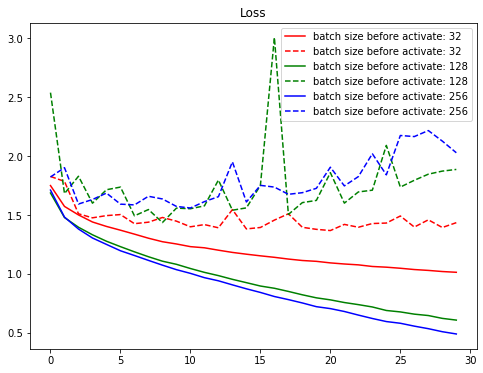

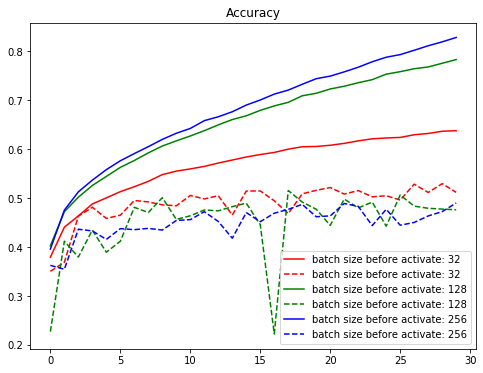

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()